In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("E:\kaggle_1\pima-indians\PimaIndians.csv")

In [3]:
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif


In [4]:
df['Result']=np.where(df['test']=='negatif',0,1)

In [5]:
df=df.drop(['test'],axis=1)

In [6]:
df[['Result']].count()

Result    392
dtype: int64

In [7]:
df.groupby('Result').count()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
Result,,,,,,,,
0,262,262,262,262,262,262,262,262
1,130,130,130,130,130,130,130,130


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_x=df.iloc[:,0:7]
df_y=df.iloc[:,8]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [11]:
from sklearn import svm

In [12]:
import collections
def CountFrequency(arr):
    return collections.Counter(arr) 
freq = CountFrequency(y_train)
for key, value in freq.items(): 
    print (key, " -> ", value)

1  ->  89
0  ->  173


In [13]:
import collections
def CountFrequency(arr):
    return collections.Counter(arr) 
freq = CountFrequency(y_test)
for key, value in freq.items(): 
    print (key, " -> ", value)

0  ->  89
1  ->  41


In [14]:
model_svm=svm.SVC(kernel='linear',C=1,gamma=1)

In [15]:
model_svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
model_svm.score(X_train,y_train)

0.8091603053435115

In [17]:
from sklearn import metrics

In [18]:
y_pred=model_svm.predict(X_test)

In [19]:
metrics.confusion_matrix(y_test,y_pred)

array([[75, 14],
       [21, 20]], dtype=int64)

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
pca=PCA(n_components=2)

In [22]:
X_train=StandardScaler().fit_transform(X_train)


C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
pc_train=pca.fit_transform(X_train)

In [24]:
X_test=StandardScaler().fit_transform(X_test)

C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
pca.explained_variance_ratio_

array([0.30997816, 0.20425749])

In [26]:
pc=pd.DataFrame(pc_train)

In [27]:
y_t=pd.DataFrame(y_train)
y_t['pca1']=pc_train[:,0]
y_t['pca2']=pc_train[:,1]

C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


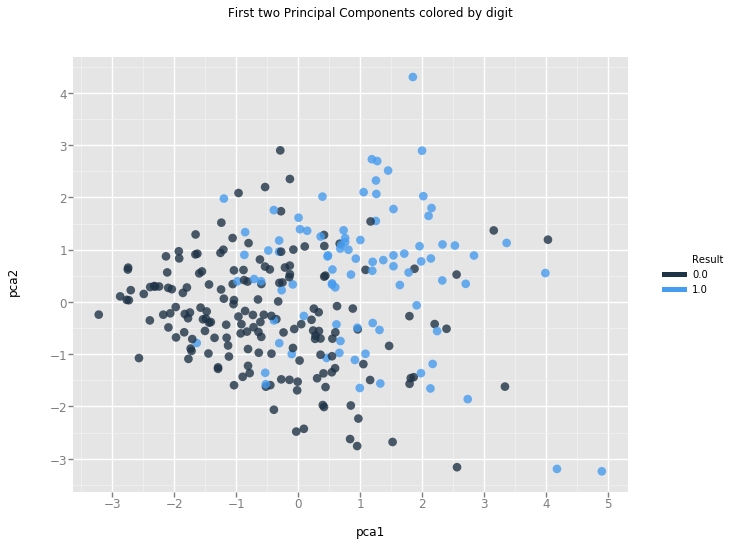

<ggplot: (98284581103)>

In [28]:
from ggplot import *
chart = ggplot( y_t, aes(x='pca1', y='pca2', color='Result') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First two Principal Components colored by digit")
chart

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
model_lda=lda.fit(X_train,y_train.ravel())

In [30]:
y_pred_lda=lda.predict_proba(X_test)[:,1]

In [31]:
y_pred_lda=np.where(y_pred_lda>=.5,1,0)

In [32]:
metrics.confusion_matrix(y_test,y_pred_lda)

array([[73, 16],
       [19, 22]], dtype=int64)

In [33]:
auc_r=metrics.roc_auc_score(y_test,y_pred_lda)

In [34]:
auc_r

0.6784050424773911

In [35]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_lda)
roc_auc = metrics.auc(fpr, tpr)

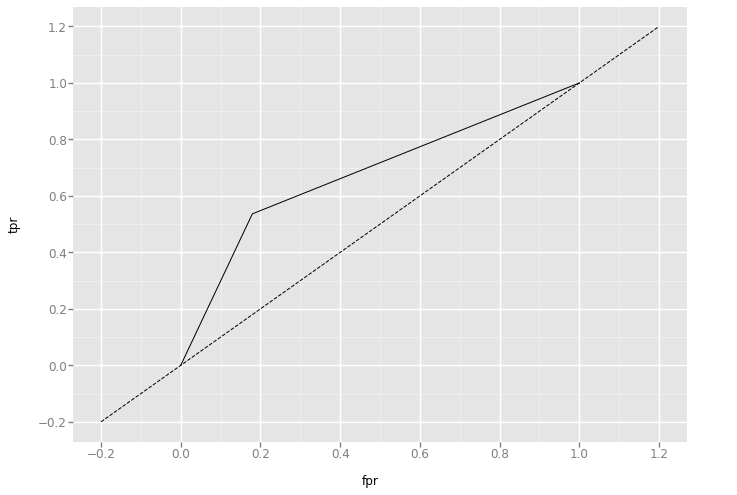

<ggplot: (-9223371938569961882)>

In [36]:
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [37]:
from sklearn import tree

In [38]:
model_tree=tree.DecisionTreeClassifier()

In [39]:
model_tree=model_tree.fit(X_train,y_train)

In [40]:
model_tree.feature_importances_

array([0.09128828, 0.39613273, 0.06584132, 0.03240187, 0.11064219,
       0.15306162, 0.15063199])

In [41]:
import graphviz

In [42]:
data_treeplot=tree.export_graphviz(model_tree,out_file='D_Tree.dot')
graph=graphviz.Source(data_treeplot)

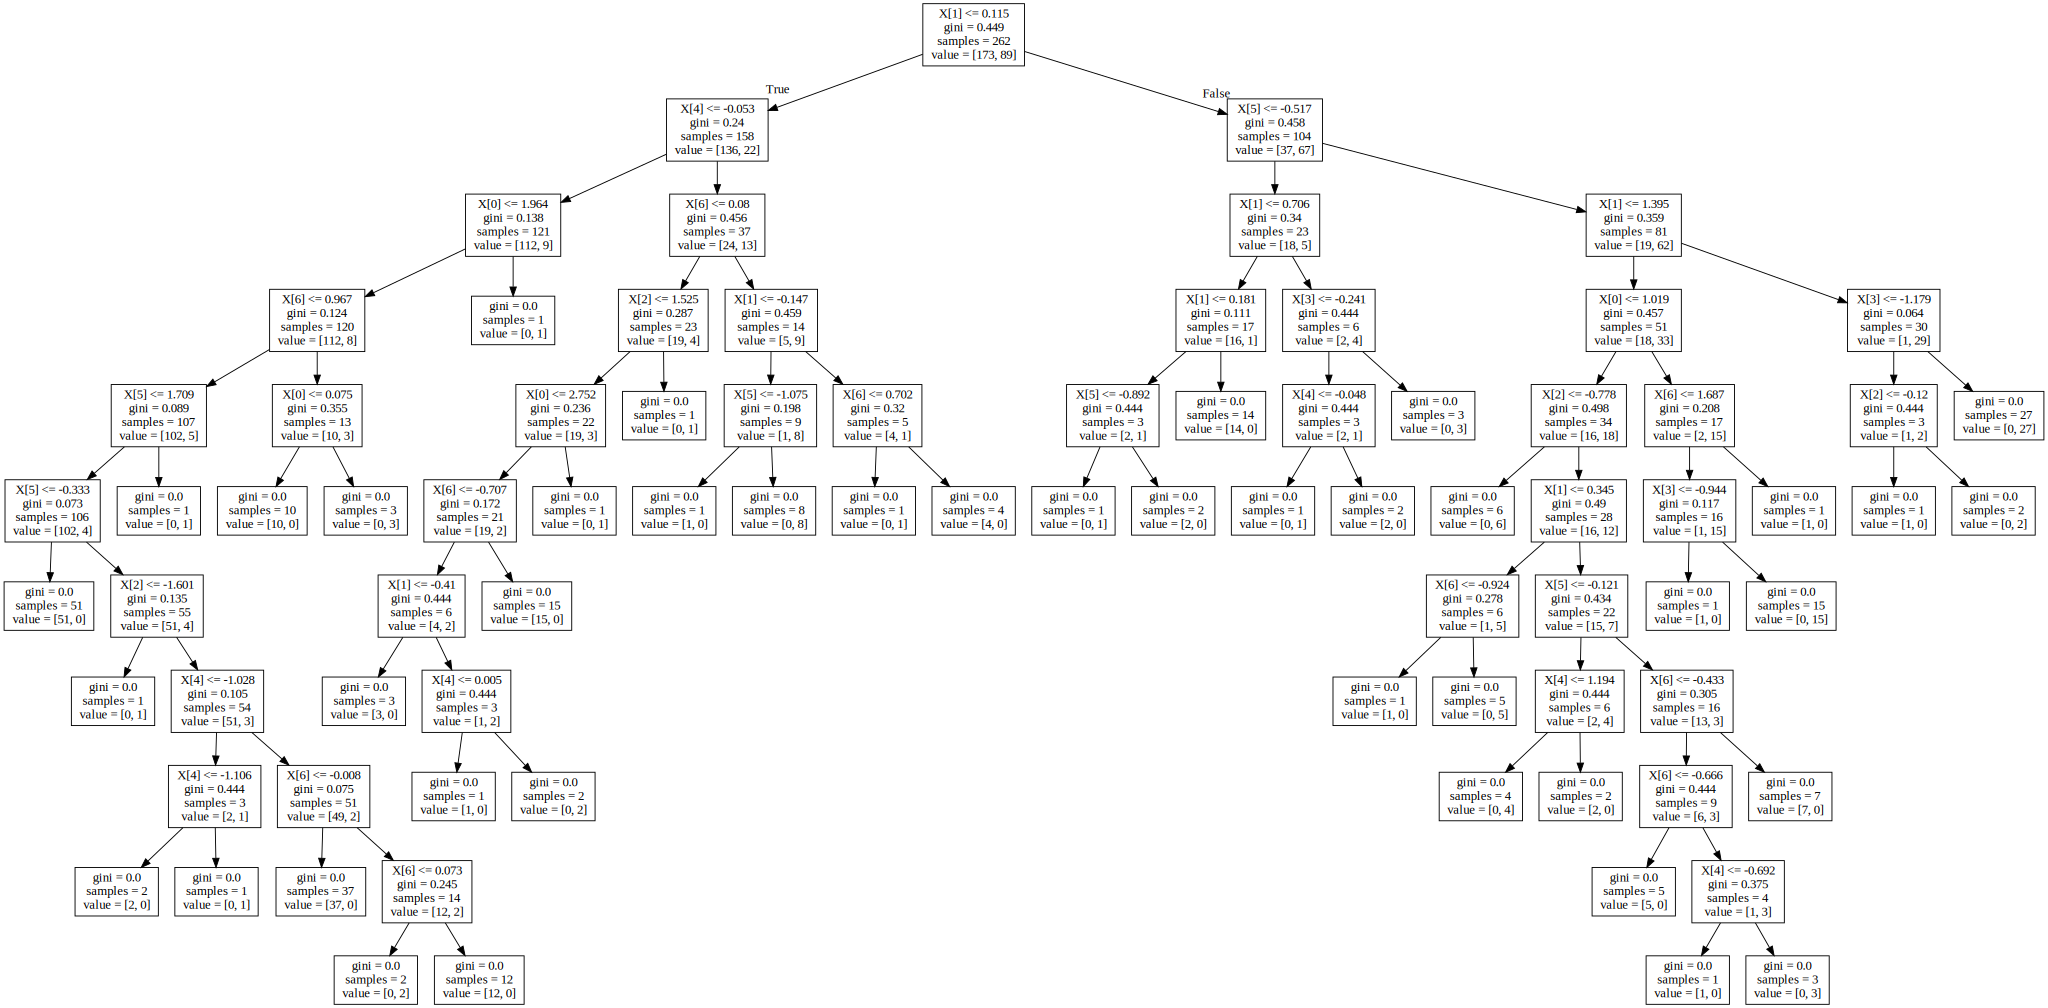

In [43]:
with open("D_Tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_rf=RandomForestClassifier(n_estimators=1000)
model_rf=model_rf.fit(X_train,y_train)

In [48]:
model_rf.feature_importances_

array([0.11449682, 0.29801377, 0.08335791, 0.09496012, 0.16504059,
       0.13380304, 0.11032774])

In [49]:
y_pred_rf=model_rf.predict(X_test)

In [50]:
metrics.confusion_matrix(y_test,y_pred_rf)

array([[71, 18],
       [18, 23]], dtype=int64)

In [63]:
model_rf=RandomForestClassifier(n_estimators=1000,max_depth=3)
model_rf=model_rf.fit(X_train,y_train)

In [64]:
model_rf.feature_importances_

array([0.12775377, 0.37310455, 0.04185003, 0.08055734, 0.20099054,
       0.11298979, 0.06275398])

In [65]:
y_pred_rf=model_rf.predict(X_test)

In [66]:
metrics.confusion_matrix(y_test,y_pred_rf)

array([[73, 16],
       [21, 20]], dtype=int64)